# Exploratory Data Analysis (EDA)
A table/dataframe is a useful way to represent your data during the data cleaning process. However, it doesn't tell us much about the data besides its size and types of variables it contains. Other types of visualizations can uncover more things, like the relationships between variables, etc.

EDA is the step that comes after data cleaning and before model pipelines.

### Import libraries

In [1]:
import pandas as pd
from sklearn.externals import joblib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
start = datetime.now()

df_original = joblib.load('../3.customer_segmentation/data/df_original.p')
df = joblib.load('../3.customer_segmentation/data/df.p')

end = datetime.now()
print(end - start)

0:00:00.453930


In [3]:
df.tail(2)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Dayofweek,Hour
380578,516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,11,2,17
380579,516368,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11,2,17


## Exploratory Data Analysis 

In [4]:
# Do a groupby (on Country) for InvoiceNo to count the number of orders per country (top 10)

df[['Country', 'InvoiceNo']].groupby(['Country'])['InvoiceNo'].aggregate('count').reset_index().sort_values(by='InvoiceNo', ascending=False).head(10)

,Country,InvoiceNo
35,United Kingdom,338520
14,Germany,8723
13,France,8017
10,EIRE,6917
30,Spain,2419
23,Netherlands,2273
3,Belgium,1937
32,Switzerland,1841
26,Portugal,1361
0,Australia,1182


In [5]:
# Do a groupby (on Country) for Quantity to count the number of orders per country (top 10)

df[['Country', 'Quantity']].groupby(['Country'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False).head(10)

,Country,Quantity
35,United Kingdom,3996133
23,Netherlands,192403
10,EIRE,136329
14,Germany,115255
13,France,107686
0,Australia,83901
31,Sweden,36043
32,Switzerland,30082
30,Spain,27666
19,Japan,26016


In [6]:
Check out Netherlands:

192403/2273

SyntaxError: invalid syntax (<ipython-input-6-7195c44c2b0e>, line 1)

Looks like the number of invoices and the quantity of items ordered correlate quite well (as expected). Germany & France's customers have more single purchases, whereas Netherlands has a whopping average of 84 items per order.

Now that we've cleaned all the data, let's do some feature extraction!

In [7]:
df[df['Country']=='Netherlands']

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Dayofweek,Hour
376,385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791.0,Netherlands,12,2,11
377,386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,12,2,11
24449,37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,12,0,10
24450,37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,12,0,10
24451,37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,12,0,10
24452,37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646.0,Netherlands,12,0,10
24453,37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646.0,Netherlands,12,0,10
24454,37957,539491,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-12-20 10:09:00,2.10,14646.0,Netherlands,12,0,10
24455,37958,539491,21246,RED RETROSPOT BIG BOWL,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,12,0,10
24456,37959,539491,22960,JAM MAKING SET WITH JARS,1,2010-12-20 10:09:00,4.25,14646.0,Netherlands,12,0,10


In [8]:
# Calculate the number of unique customers from each country

cust_country = df[['Country', 'CustomerID']].drop_duplicates()

In [9]:
cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values(by='CustomerID', ascending=False).head(10)

,Country,CustomerID
35,United Kingdom,3886
14,Germany,93
13,France,86
30,Spain,29
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,11
1,Austria,11


### Plot customer distrubtion: unique customers per country

In [10]:
count_cust_country = cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values(by='CustomerID', ascending=False).head(10)

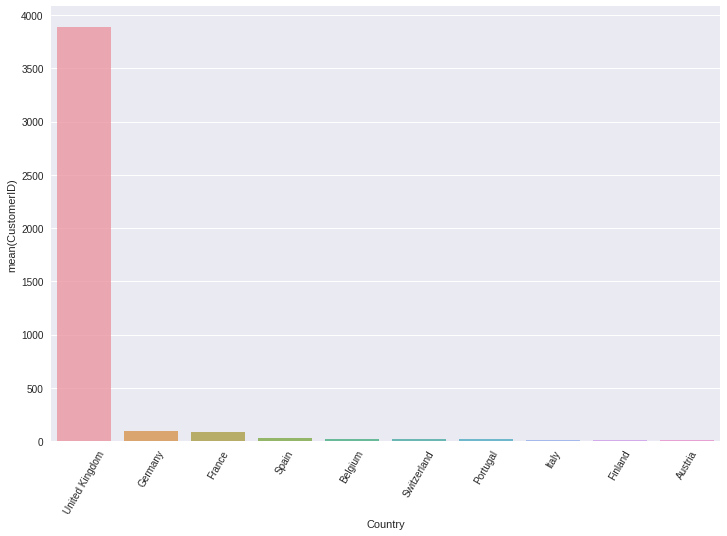

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(count_cust_country['Country'], count_cust_country['CustomerID'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

We can visually see that a huge chunk of customers come from the United Kingdom. The company should focus on the United Kingfom for its marketing and other strategies.

### Plot customer distrubtion: total purchases per country

In [12]:
count_quant_country = df[['Country', 'Quantity']].groupby(['Country'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False).head(10)

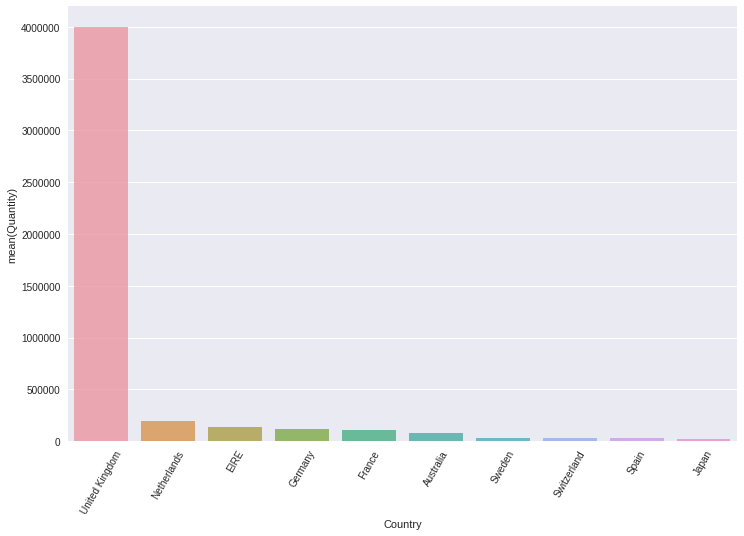

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(count_quant_country['Country'], count_quant_country['Quantity'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

### Plot distrubtion: most popular items

In [14]:
count_quant_item = df[['Description', 'Quantity']].groupby(['Description'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False).head(20)

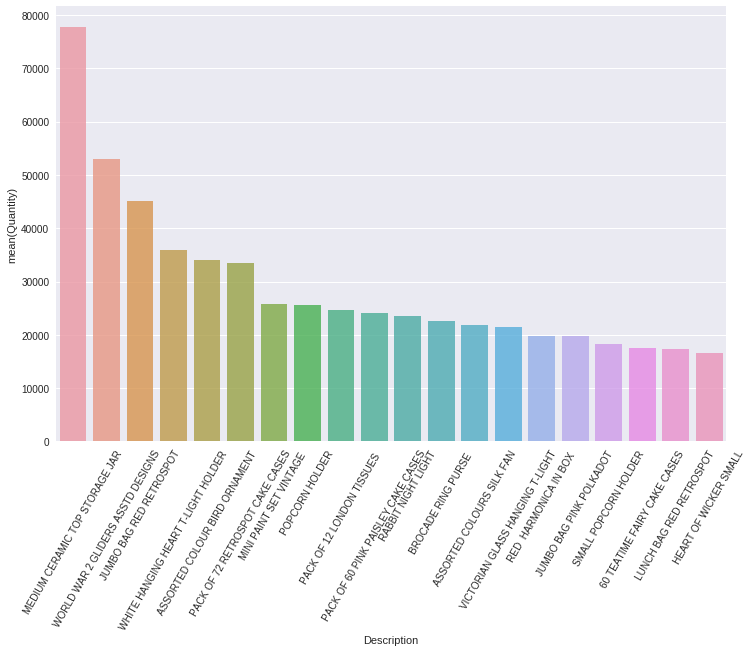

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(count_quant_item['Description'], count_quant_item['Quantity'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

### Plot distrubtion: most profitable items

In [16]:
# Calculate the total sales for each product by multiplying Quantity with Unit Price.

df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [17]:
count_total_item = df[['Description', 'TotalPrice']].groupby(['Description'])['TotalPrice'].aggregate('sum').reset_index().sort_values(by='TotalPrice', ascending=False).head(20)

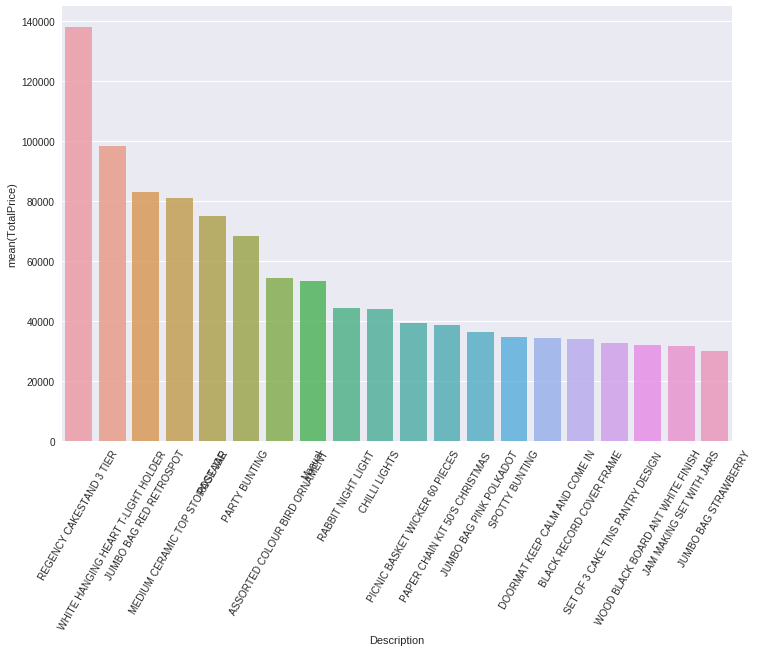

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(count_total_item['Description'], count_total_item['TotalPrice'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

What are the items that sell the most and cost the most?

In [19]:
count_quant_item[:10]

,Description,Quantity
1985,MEDIUM CERAMIC TOP STORAGE JAR,77729
3777,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53052
1761,JUMBO BAG RED RETROSPOT,45126
3689,WHITE HANGING HEART T-LIGHT HOLDER,35980
216,ASSORTED COLOUR BIRD ORNAMENT,34088
2262,PACK OF 72 RETROSPOT CAKE CASES,33409
2040,MINI PAINT SET VINTAGE,25785
2591,POPCORN HOLDER,25569
2228,PACK OF 12 LONDON TISSUES,24728
2260,PACK OF 60 PINK PAISLEY CAKE CASES,24047


In [20]:
count_total_item[:10]

,Description,TotalPrice
2758,REGENCY CAKESTAND 3 TIER,138047.92
3689,WHITE HANGING HEART T-LIGHT HOLDER,98452.36
1761,JUMBO BAG RED RETROSPOT,83200.38
1985,MEDIUM CERAMIC TOP STORAGE JAR,81213.22
2602,POSTAGE,75043.96
2337,PARTY BUNTING,68379.03
216,ASSORTED COLOUR BIRD ORNAMENT,54580.88
2123,Manual,53341.83
2647,RABBIT NIGHT LIGHT,44456.44
722,CHILLI LIGHTS,44170.09


### Plot distrubtion: trends in date/time

In [21]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Dayofweek,Hour,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2,8,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,8,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2,8,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,8,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,8,20.34


In [22]:
count_quant_month = df[['Month', 'Quantity']].groupby(['Month'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False)

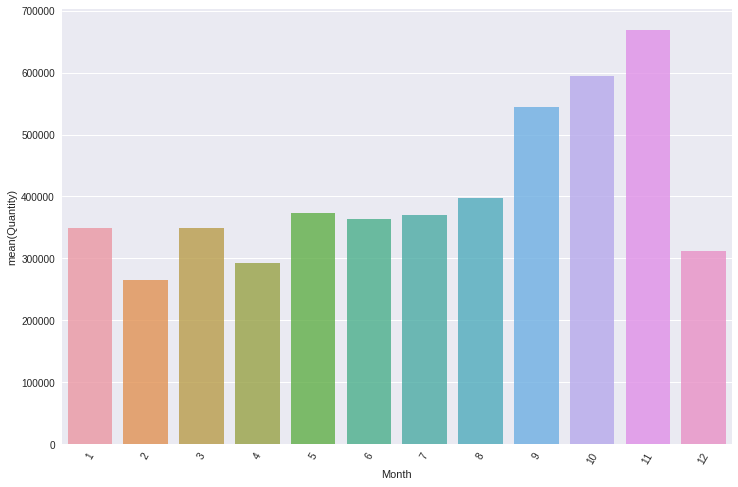

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(count_quant_month['Month'], count_quant_month['Quantity'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

In [24]:
count_quant_dayofweek = df[['Dayofweek', 'Quantity']].groupby(['Dayofweek'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False)

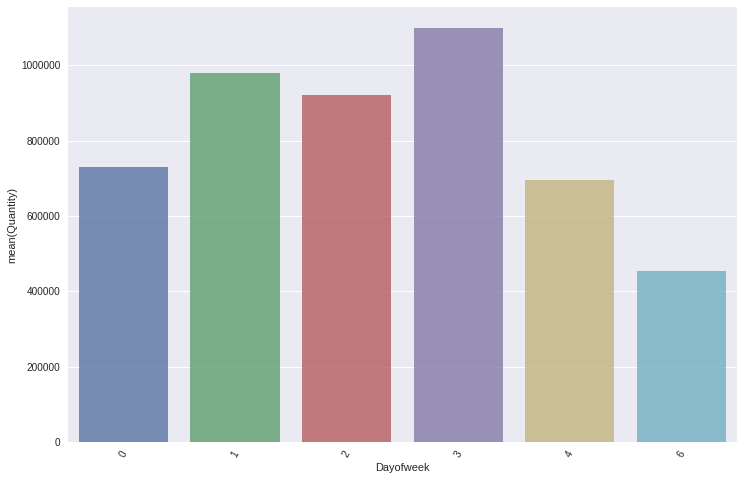

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(count_quant_dayofweek['Dayofweek'], count_quant_dayofweek['Quantity'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()

In [26]:
count_quant_hour = df[['Hour', 'Quantity']].groupby(['Hour'])['Quantity'].aggregate('sum').reset_index().sort_values(by='Quantity', ascending=False)

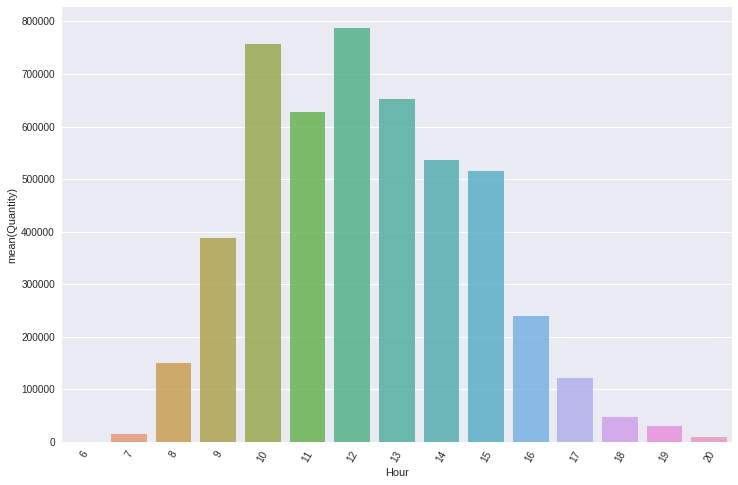

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(count_quant_hour['Hour'], count_quant_hour['Quantity'], alpha=0.8)
plt.xticks(rotation='60')
plt.show()